<a href="https://colab.research.google.com/github/BaniBrinkman/BaniBrinkman/blob/main/CapstoneIIISteamData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Steam Data Set 

In the following dataset we will be going through infomation collected from a gaming platform called steam. It contains various games that are single-player and multi-player, as well as free or paid gaming. My questions going in is are single-player games played more than multi-player games? Also between the two, who has the most time played? My hypothesis going in would be that the multi-player games would be played more as people want to connect with others. My second hypothesis is that with either gaming the games which are free will be played more than those you have to pay for. Both of these hypothesis will be tested via box plots, scatter plots, histograms, and t-tests.

Data source: https://www.kaggle.com/datasets/nikdavis/steam-store-games/code

### Import Modudel 

In [ ]:
import math 
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()

import warnings

warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
steamdf = pd.read_csv('/content/gdrive/My Drive/Steam_Data2.csv')

In [ ]:
steamdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             3790 non-null   int64  
 1   name              3790 non-null   object 
 2   release_date      3790 non-null   object 
 3   english           3790 non-null   int64  
 4   developer         3790 non-null   object 
 5   publisher         3790 non-null   object 
 6   platforms         3790 non-null   object 
 7   required_age      3790 non-null   int64  
 8   categories        3790 non-null   object 
 9   player_type       3790 non-null   object 
 10  genres            3790 non-null   object 
 11  steamspy_tags     3790 non-null   object 
 12  achievements      3790 non-null   int64  
 13  positive_ratings  3790 non-null   int64  
 14  negative_ratings  3790 non-null   int64  
 15  average_playtime  3790 non-null   int64  
 16  median_playtime   3790 non-null   int64  


In [ ]:
steamdf.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,player_type,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,free/paid
0,204300,Awesomenauts - the 2D moba,8/1/2012,1,Ronimo Games,Ronimo Games,windows;mac;linux,0,Single-player;Multi-player;Co-op;Shared/Split ...,Multi-Player,Action;Free to Play;Indie;Strategy,MOBA;Multiplayer;Platformer,59,20770,3678,999,490,2000000-5000000,0.00,Free
1,10180,Call of Duty®: Modern Warfare® 2,11/11/2009,1,Infinity Ward;Aspyr (Mac),Activision;Aspyr (Mac),windows;mac,0,Single-player;Multi-player;Co-op;Steam Achieve...,Multi-Player,Action,Action;FPS;Multiplayer,50,30006,2826,999,580,5000000-10000000,19.99,Paid
2,525920,Pro Cycling Manager 2017,6/15/2017,1,Cyanide Studio,Focus Home Interactive,windows,0,Single-player;Online Multi-Player;Steam Achiev...,Multi-Player,Simulation;Sports,Sports;Simulation;Multiplayer,64,194,106,999,999,50000-100000,24.99,Paid
3,307960,IL-2 Sturmovik: Battle of Stalingrad,10/22/2014,1,1C Game Studios;777 Studios,1C Game Studios,windows,0,Single-player;Multi-player;Co-op;Steam Trading...,Multi-Player,Action;Simulation,Simulation;Flight;World War II,0,1571,653,997,1424,100000-200000,39.99,Paid
4,40300,Risen,10/2/2009,1,Piranha Bytes,Deep Silver,windows,0,Single-player;Steam Trading Cards,Single-player,RPG,RPG;Open World;Gothic,0,3848,585,994,650,500000-1000000,7.99,Paid


In [ ]:
steamdf.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,3.790000e+03,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,3.937806e+05,0.995251,0.903166,40.307652,2311.159367,446.165963,314.148021,334.774934,7.174375
std,1.853117e+05,0.068761,3.826036,229.343317,6557.302217,1161.193444,182.883352,221.116849,7.334100
min,2.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,10.000000,0.000000
25%,2.738700e+05,1.000000,0.000000,0.000000,91.000000,37.000000,201.000000,212.000000,1.990000
50%,3.906900e+05,1.000000,0.000000,15.500000,399.500000,109.000000,259.000000,271.000000,4.990000
75%,5.219475e+05,1.000000,0.000000,35.000000,1720.500000,348.750000,364.000000,382.000000,10.990000
max,1.051310e+06,1.000000,18.000000,5000.000000,118634.000000,25920.000000,999.000000,1754.000000,49.990000


In [ ]:
steamdf.isnull().sum().sort_values()

appid               0
owners              0
median_playtime     0
average_playtime    0
negative_ratings    0
positive_ratings    0
achievements        0
steamspy_tags       0
genres              0
player_type         0
categories          0
required_age        0
platforms           0
publisher           0
developer           0
english             0
release_date        0
name                0
price               0
free/paid           0
dtype: int64

To this point I have downloaded a CVS file from Kaggle about Steam Video Games. In excel I cleaned the data and added two colums; player_type and free or paid. I deleted the column named categories to replace with player_type a simpler discription of which type of game play these games are, Multi-Player or Single-Player. From there I imported the data into Python/ Colabs in a jupiter notebook to investage the data.

### Explore the Dataset

In [ ]:
steamdf['player_type'].value_counts()

Single-player    2875
Multi-Player      915
Name: player_type, dtype: int64

In [ ]:
pd.crosstab(steamdf['player_type'], steamdf['free/paid'])

free/paid,Free,Paid
player_type,,
Multi-Player,161,754
Single-player,60,2815


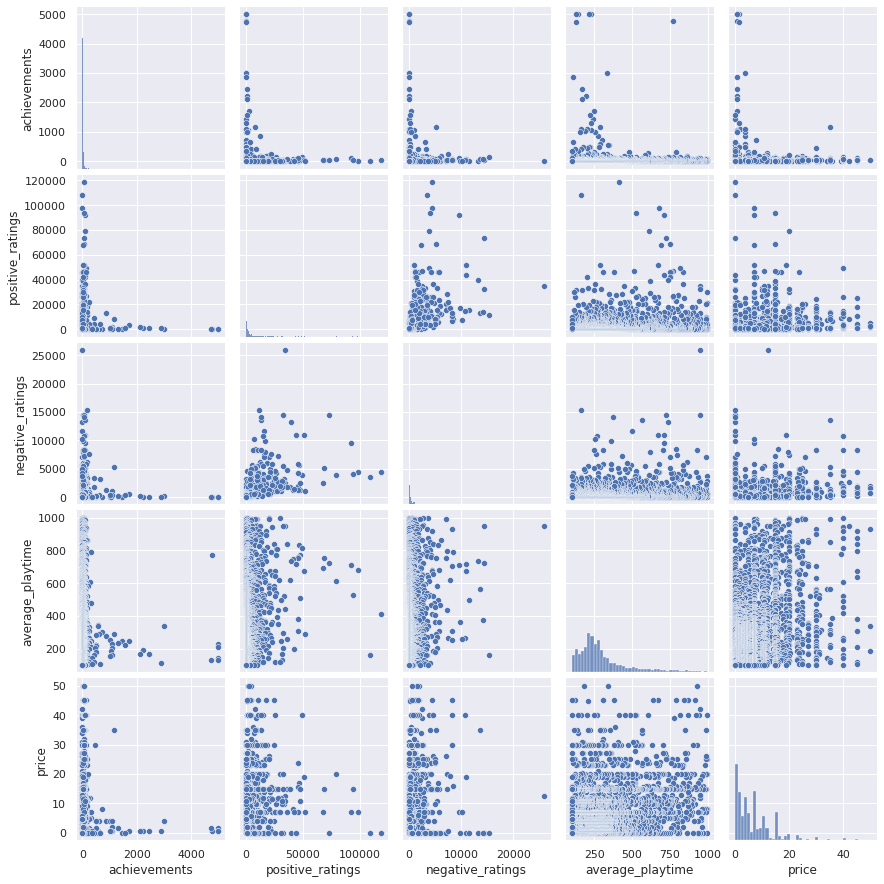

In [ ]:
sns.pairplot(steamdf, vars = ["achievements", "positive_ratings", "negative_ratings", "average_playtime", "price"]) 

In [ ]:
steamdf[["achievements", "positive_ratings", "negative_ratings", "average_playtime", "price"]].corr()

,achievements,positive_ratings,negative_ratings,average_playtime,price
achievements,1.000000,0.005349,0.013286,-0.013055,-0.017915
positive_ratings,0.005349,1.000000,0.587095,0.249495,0.194921
negative_ratings,0.013286,0.587095,1.000000,0.244186,0.222479
average_playtime,-0.013055,0.249495,0.244186,1.000000,0.267304
price,-0.017915,0.194921,0.222479,0.267304,1.000000


### Analyze the Dataset

### HYPOTHESIS 1

Null Hypothesis: There will not be a significant difference between single-player and multi-player games. 

Alt. Hypothesis: Theres a corralation of gamers that are more willing to play multi-player games than single-player games.  

In [ ]:
steamdf_single = steamdf.loc[steamdf['player_type'] == "Single-player"]
steamdf_multi = steamdf.loc[steamdf['player_type'] == "Multi-Player"]

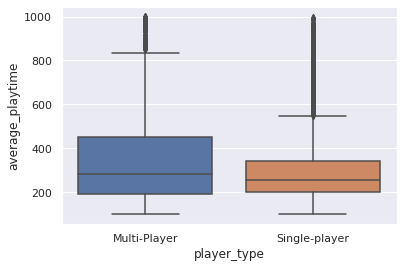

In [ ]:
sns.boxplot(y = steamdf['average_playtime'], x = steamdf['player_type'])

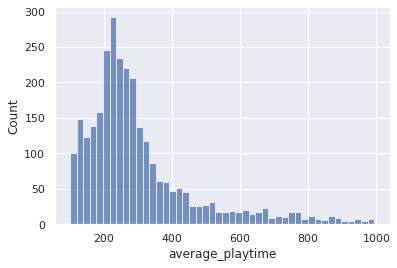

In [ ]:
sns.histplot(steamdf_single["average_playtime"])

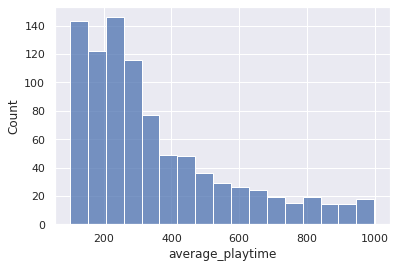

In [ ]:
sns.histplot(steamdf_multi["average_playtime"])

In [ ]:
stats.ttest_ind(steamdf_single['average_playtime'], steamdf_multi['average_playtime'])

Ttest_indResult(statistic=-7.061964762675041, pvalue=1.9443011798290214e-12)

Based off the t-test we see that there is a significant difference in steam games that are single-player and multi-player. **Null hypothesis**

### HYPOTHESIS 2


Null Hypothesis: There is no difference between the average play time whether the game is free or paid.

Alt. Hypothesis: There is a signifcant difference in steam time between the two groups.

In [ ]:
steamdf_paid = steamdf.loc[steamdf['free/paid'] == "Paid"]
steamdf_free = steamdf.loc[steamdf['free/paid'] == "Free"]

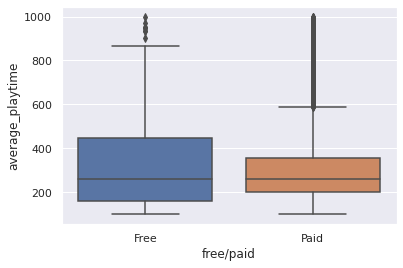

In [ ]:
sns.boxplot(y = steamdf['average_playtime'], x = steamdf['free/paid'])

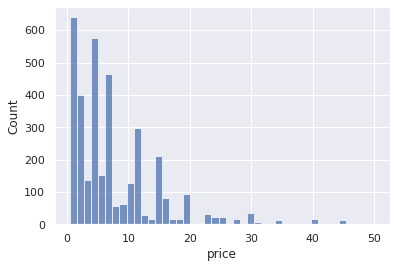

In [ ]:
sns.histplot(steamdf_paid["price"])

In [ ]:
stats.pearsonr(steamdf['average_playtime'],steamdf['price'])

(0.26730441503871, 5.081468449695924e-63)

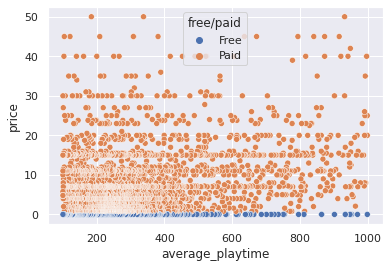

In [ ]:
sns.scatterplot(x='average_playtime', y='price', hue='free/paid', data=steamdf)

From the scatter plots we can see that there is a presence of a significance difference/correlation between paid games and free games. Null hypothesis rejected

Recommendaion: Based off the findings from both hypothesises, if the goal for steam to see if there needs to be more single player games to attracted rather than multi player games there does not need to be an additional number of games released.  

Additionally, if the goal for steam to see if there needs to be more free games to attracted new users.  Then the testing shows there does not.  That what the company is currently doing works.  